<a href="https://colab.research.google.com/github/IfenaikeElias/Agropredict/blob/main/Agropredict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mount drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


set directory to directory containing dataset for easy accesibility of data

In [ ]:
import os
os.chdir("drive/MyDrive/ML Hackathon")

return list of files in directory too see if we are on the right directory

In [ ]:
!ls

0_EAJ0001C_log_20230430-1605_to_20230629-1605.csv
0_EAJ0001C_log_20230629-1605_to_20230828-1605.csv
0_EAJ0001C_log_20230828-1605_to_20231027-1605.csv
0_EAJ0001C_log_20231027-1605_to_20231030-1604.csv
0_EAJ0010CFederalSecretariatAbuja_log_20240416-2030_to_20240615-2030.csv
0_EAJ0010CFederalSecretariatAbuja_log_20240615-2030_to_20240715-2030.csv
0_LG8016AIRTELCLUSTER2EBUTEERO_log_20240416-2031_to_20240615-2031.csv
0_LG8016AIRTELCLUSTER2EBUTEERO_log_20240615-2031_to_20240715-2031.csv
Crop_recommendation.csv
EAJ0002AUniAbuja_log_20240523-1833_to_20240622-1833.csv
EAJ0012CGSMVillage_log_20240523-1833_to_20240622-1833.csv
lstm_tuner
my_dir


In [ ]:
#import all necessary libaries
import pandas as pd
import plotly.graph_objs as go
import plotly.io as pio
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
data = pd.read_csv('Crop_recommendation.csv', low_memory = False)

In [ ]:
data.shape

(2200, 8)

In [ ]:
#load dataset
data.head(3)

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice


check columns in the dataset

In [ ]:
data.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

**Check data for null values**

After reading the data we realize dataset contains no null value, hence, would not reaquire any data cleaning process

In [ ]:
data.isnull().sum()

,0
N,0
P,0
K,0
temperature,0
humidity,0
ph,0
rainfall,0
label,0


We can proceed to check for any columns in a DataFrame that contain numeric strings.


In [ ]:
df  = data
# create an empty list to store columns with numeric strings
numeric_string_columns = []

# Iterate over the columns in the DataFrame
for col in df.columns:
    # Skip the timestamp column or other known non-numeric columns
    if  isinstance(df[col].dropna().iloc[0], str) == False:
        continue
   # Try to convert the column to numeric type
    converted = pd.to_numeric(df[col], errors='coerce')

    # If the column has at least one non-NaN value, it has numeric strings
    if converted.notna().any():
        numeric_string_columns.append(col)

print(f"There are {len(numeric_string_columns)} misrepresented columns")
print(numeric_string_columns)


There are 0 misrepresented columns
[]


check data type of each columns.


*   we see that data type is in the right format



In [ ]:
#check data type of each column
data.dtypes

,0
N,int64
P,int64
K,int64
temperature,float64
humidity,float64
ph,float64
rainfall,float64
label,object


We can check the amount of crop type availabe in our dataset by checking the number of unique entries in our label column, this would give us necessary information about the limit of crop type we will bw able to recommen based on our dataset.

In [ ]:
#check number of unique labels
data['label'].nunique()

22

We will check for number of occurence of each crop in dataset, this will give us a early awareness of class imbalance if applicable.

In [ ]:
#create a dictionary to save crop count
occurence_count = {}
# iterate to label column
for each in data['label']:
#count the occurence of each crop in data
  occurence_count[each] = occurence_count.get(each, 0) + 1
#return count
occurence_count

{'rice': 100,
 'maize': 100,
 'chickpea': 100,
 'kidneybeans': 100,
 'pigeonpeas': 100,
 'mothbeans': 100,
 'mungbean': 100,
 'blackgram': 100,
 'lentil': 100,
 'pomegranate': 100,
 'banana': 100,
 'mango': 100,
 'grapes': 100,
 'watermelon': 100,
 'muskmelon': 100,
 'apple': 100,
 'orange': 100,
 'papaya': 100,
 'coconut': 100,
 'cotton': 100,
 'jute': 100,
 'coffee': 100}

In the absence of uneven distribution of instances across different classes or label (or  class imbalance), we can go ahead to check correlation between each column.

In [ ]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=df)

https://docs.google.com/spreadsheets/d/1pGHvljQv47dq4_7tCO8N2cWhXl4GtZ96ITo1eB_VN6o#gid=0


/usr/local/lib/python3.10/dist-packages/google/colab/sheets.py:31: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return frame.applymap(_clean_val).replace({np.nan: None})


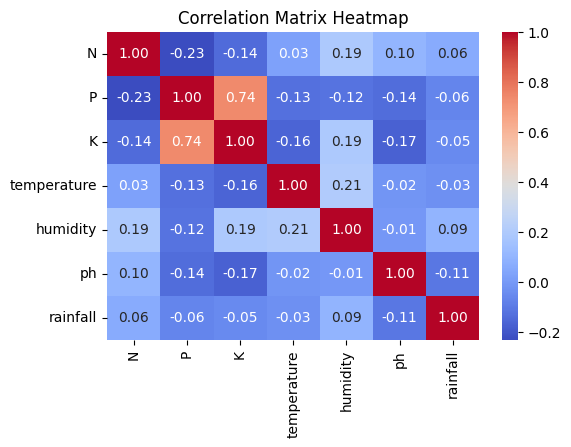

In [ ]:
#save correlation dataframe
df_ = df.drop('label', axis= 1)
correlation_matrix = df_.corr(method='pearson')

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()


After plotting the correlation matrix we observe that there is a strong positive correlation between the potassium (k) and phosphorus (P) level of the soil.

We can go ahead to check statistical distribution in our data set using violing plots.




*   We used the Violin plots  to display statistical distribution of  data, it similar to a box plot, but with added information, it shows the density of the data  making it easier to see the shape of the distribution.

*   We compared the distributions of multiple crop in a single plot in order to easily visualize and  compare spreads of different distributions.

*   It also facilitates oulier detection.








In [ ]:
fig = go.Figure()

# Loop through each column in the DataFrame and add a violin plot trace for each
for column in df.columns:
    fig.add_trace(go.Violin(
        y=df[column],
        # Use the column name as the label
        name=column,
        # Show box plot inside violin
        box_visible=True,
        # Show mean line
        meanline_visible=True,
        # Show all points
        # points="all",
        # Enable hover for points
        hoveron='points',
    ))

# Update the layout for better visualization
fig.update_layout(
    title="Statistical distribution in Crop data",
    yaxis_title="Values",
    xaxis_title="Columns",
    template="plotly_white",
    # Space between violin plots
    violingap=0.1,
    # Space between groups of violins
    violingroupgap=0.5
)

# Show the combined plot
fig.show()

The following observation could be drawn from the distribution:


*   Nutrients (N, P, K) show wide variability, which is expected since nutrient levels can differ greatly across soils and regions.

*   Temperature and Humidity are more stable, with lower variance, suggesting a more consistent climate.

*   pH values are tightly clustered, indicating that the soil acidity/alkalinity is fairly uniform across observations.

*   Rainfall shows significant variability, which could imply diverse climatic conditions affecting the dataset, including occasional heavy rainfall events.










Taking a closer look at the distribution of  Temperature and pH.

In [ ]:
df = data.copy()
# Create subplots for 'temperature' and 'ph' histograms
fig = px.histogram(df, x='temperature', nbins=20, color_discrete_sequence=['red'], title='Temperature Distribution')
fig2 = px.histogram(df, x='ph', nbins=20, color_discrete_sequence=['blue'], title='pH Distribution')

# Set layout for the first histogram
fig.update_layout(
    xaxis_title='Temperature',
    yaxis_title='Count',
    bargap=0.1,
    margin=dict(l=0, r=0, t=30, b=0)
)
fig.update_xaxes(showline=True, linewidth=0.5, linecolor='black', mirror=True)
fig.update_yaxes(showline=True, linewidth=0.5, linecolor='black', mirror=True)

# Set layout for the second histogram
fig2.update_layout(
    xaxis_title='pH',
    yaxis_title='Count',
    bargap=0.1,
    margin=dict(l=0, r=0, t=30, b=0)
)
fig2.update_xaxes(showline=True, linewidth=0.5, linecolor='black', mirror=True)
fig2.update_yaxes(showline=True, linewidth=0.5, linecolor='black', mirror=True)

# Display histograms
fig.show()
fig2.show()

Taking a better look...

In [ ]:

def analyze_crop(data, feature):
  df = data

  # Group data by 'label' and find the mode of 'rainfall' for each group
  modal_feature = df.groupby('label')[feature].apply(lambda x: x.mode().iloc[0]).reset_index()

  # Rename the columns for clarity
  modal_feature.columns = ['label', f"modal_{feature}"]

  # Create a bar plot
  fig = px.bar(modal_feature, x='label', y=f'modal_{feature}', color='label', title= f'Crop vs Modal {feature}',
              labels={'label': 'Label', f'modal {feature}': f'Modal {feature}', 'crop': 'Crop'})
  fig.update_traces(width=0.5)

  # Update layout for a better look
  fig.update_layout(barmode='group', xaxis_title='Label', yaxis_title=f'Modal {feature}')

  # Show plot
  fig.show()
  print(modal_feature)



In [ ]:
analyze_crop(data, 'N')

          label  modal_N
0         apple       29
1        banana      108
2     blackgram       44
3      chickpea       57
4       coconut       27
5        coffee       99
6        cotton      107
7        grapes       32
8          jute       89
9   kidneybeans       27
10       lentil        6
11        maize       74
12        mango       12
13    mothbeans       22
14     mungbean       31
15    muskmelon       95
16       orange       13
17       papaya       34
18   pigeonpeas       16
19  pomegranate        4
20         rice       60
21   watermelon       83


In [ ]:
analyze_crop(data, 'P')

          label  modal_P
0         apple      143
1        banana       79
2     blackgram       62
3      chickpea       60
4       coconut        6
5        coffee       40
6        cotton       36
7        grapes      139
8          jute       41
9   kidneybeans       59
10       lentil       61
11        maize       60
12        mango       36
13    mothbeans       45
14     mungbean       37
15    muskmelon       25
16       orange        7
17       papaya       68
18   pigeonpeas       72
19  pomegranate       21
20         rice       35
21   watermelon       25


In [ ]:
analyze_crop(data, 'K')

          label  modal_K
0         apple      196
1        banana       55
2     blackgram       15
3      chickpea       78
4       coconut       29
5        coffee       30
6        cotton       18
7        grapes      203
8          jute       43
9   kidneybeans       22
10       lentil       22
11        maize       17
12        mango       31
13    mothbeans       20
14     mungbean       15
15    muskmelon       52
16       orange        8
17       papaya       52
18   pigeonpeas       19
19  pomegranate       38
20         rice       38
21   watermelon       50


In [ ]:
analyze_crop(data, 'temperature')

          label  modal_temperature
0         apple          21.036527
1        banana          25.010185
2     blackgram          25.097374
3      chickpea          17.024985
4       coconut          25.008724
5        coffee          23.059519
6        cotton          22.000851
7        grapes           8.825675
8          jute          23.094338
9   kidneybeans          15.330426
10       lentil          18.064861
11        maize          18.041855
12        mango          27.003155
13    mothbeans          24.018254
14     mungbean          27.014704
15    muskmelon          27.024151
16       orange          10.010813
17       papaya          23.012402
18   pigeonpeas          18.319104
19  pomegranate          18.071330
20         rice          20.045414
21   watermelon          24.043558


In [ ]:
analyze_crop(data, 'rainfall')

          label  modal_rainfall
0         apple      100.117344
1        banana       90.109781
2     blackgram       60.417903
3      chickpea       65.113656
4       coconut      131.090008
5        coffee      115.156401
6        cotton       60.653817
7        grapes       65.010953
8          jute      150.235524
9   kidneybeans       60.275525
10       lentil       35.034848
11        maize       60.651715
12        mango       89.291476
13    mothbeans       30.920140
14     mungbean       36.120429
15    muskmelon       20.211267
16       orange      100.173796
17       papaya       40.351531
18   pigeonpeas       90.054227
19  pomegranate      102.518476
20         rice      182.561632
21   watermelon       40.126504


We can go ahead to visualize the N-P-K composition percentage for soil, then we can know what ratio of N-P-K nutrient level will facilitate individual crop production

we will use modal N-P-K level of each crop to evaluate this ratio (or percentages).

In [ ]:
#select label alonside N-P-K level
nutrient_level = data[['N', 'P', 'K','label']]

In [ ]:
#group data by crop and get most occuring N-P-K level for each crop
modal_nutrient= df.groupby('label')[['N','P','K']].apply(lambda x: x.mode().iloc[0]).reset_index()


In [ ]:
modal_nutrient

,label,N,P,K
0,apple,29.0,143.0,196.0
1,banana,108.0,79.0,55.0
2,blackgram,44.0,62.0,15.0
3,chickpea,57.0,60.0,78.0
4,coconut,27.0,6.0,29.0
5,coffee,99.0,40.0,30.0
6,cotton,107.0,36.0,18.0
7,grapes,32.0,139.0,203.0
8,jute,89.0,41.0,43.0
9,kidneybeans,27.0,59.0,22.0


In [ ]:
# Calculate row-wise total for N, P and K columns
N_P_K_total = modal_nutrient.select_dtypes(include=['number']).sum(axis=1)

# Divide each N, P, K element by the row total and multiply by 100 to get percentages
percentages = modal_nutrient.select_dtypes(include=['number']).div(N_P_K_total, axis=0) * 100

# Combine the percentages with the original DataFrame
nutrient_percentages = pd.concat([modal_nutrient.select_dtypes(exclude=['number']), percentages], axis=1)
print(nutrient_percentages)

0         label          N          P          K
0         apple   7.880435  38.858696  53.260870
1        banana  44.628099  32.644628  22.727273
2     blackgram  36.363636  51.239669  12.396694
3      chickpea  29.230769  30.769231  40.000000
4       coconut  43.548387   9.677419  46.774194
5        coffee  58.579882  23.668639  17.751479
6        cotton  66.459627  22.360248  11.180124
7        grapes   8.556150  37.165775  54.278075
8          jute  51.445087  23.699422  24.855491
9   kidneybeans  25.000000  54.629630  20.370370
10       lentil   6.741573  68.539326  24.719101
11        maize  49.006623  39.735099  11.258278
12        mango  15.189873  45.569620  39.240506
13    mothbeans  25.287356  51.724138  22.988506
14     mungbean  37.349398  44.578313  18.072289
15    muskmelon  55.232558  14.534884  30.232558
16       orange  46.428571  25.000000  28.571429
17       papaya  22.077922  44.155844  33.766234
18   pigeonpeas  14.953271  67.289720  17.757009
19  pomegranate   6.

Visualize N-P-K level distribution for soil for each crop.

In [ ]:
# Melt the DataFrame to have a 'nutrient' column for the nutrients
nutrient_melted = nutrient_percentages.melt(id_vars='label', var_name='nutrient', value_name='level')

# Create a bar chart
fig = px.bar(nutrient_melted, x='label', y='level', color='nutrient', barmode='group',
             labels={'level': 'Nutrient Level', 'label': 'crop'}, title='Nutrient Levels of Different Crops')

# Show the plot
fig.show()


In [ ]:
nutrient_melted

,label,nutrient,level
0,apple,N,7.880435
1,banana,N,44.628099
2,blackgram,N,36.363636
3,chickpea,N,29.230769
4,coconut,N,43.548387
...,...,...,...
61,papaya,K,33.766234
62,pigeonpeas,K,17.757009
63,pomegranate,K,60.317460
64,rice,K,28.571429


We will now create a piechart for each crop to have a better look at the N-P-K percentage of soil that facilitate production of each crop.

In [ ]:
# Create a sunburst chart for each label
for label in nutrient_melted['label'].unique():
    data = nutrient_melted[nutrient_melted['label'] == label]

    fig = px.sunburst(data, path=['label', 'nutrient'], values='level', title=label)
    fig.update_traces(insidetextorientation='radial')

    # Display the sunburst chart
    fig.show()


# **Model development**

Recomending best crop to plant to optimize harvest is treated as a Classification problem because we will be attaching  different crops to different soil profiles. Soil profile includes the following soil features:


*   Soil Nutrient: Nitrogen (N), phosphorus (P) and potassium (K)
*   Soil temperature
*   Soil PH
*   Climate conditions like Rainfall and humidity.








We will be training different models, monitoring their performance and conducting comparative analysis on which model predicts best and we will be optimizing the models by performing model performance optimization techniques like **Hyperparameter tunning** and **Cross validation**.

Classification models considered in this project include:


*   K Nearest Neighbor Classifier
*   Random forest Classifier
*   Naive bayes Gaussian Classifier

These models where chosen for the following reasons:


1.   KNN:
        * KNN is a simple and easy-to-understand algorithm, making it suitable for straightforward classification tasks like crop recommendation.
        * KNN makes predictions based on the similarity of the input data to known data points, which can be effective for recommending crops based on similarities to past successful crop recommendations.



2.   Random Forest Classifier:

        * Random Forest is an ensemble learning method that combines multiple decision trees to improve the overall performance and generalizability of the model.
        * Random Forest can capture non-linear relationships in the data.


3.   Naive bayes Classifier:
      
      * Naive Bayes is computationally efficient and fast and can handle large datasets with high dimensions.
      * Naive Bayes is computationally efficient and can handle large datasets with high dimensions.
      * Naive Bayes classifiers are simple and easy to interpret,











In [ ]:
#load data
data = pd.read_csv('Crop_recommendation.csv', low_memory = False)

We can go ahead to identify our target variable which is a label that tells us which crop produces optimal harvest based on soil profile

In [ ]:
#select label
target = data['label']

In [ ]:
#select features
features = data.drop('label', axis= 1)

In [ ]:
#import all necessary libaries
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
import joblib




In [ ]:
# Create features and target variables
X = features
y = target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



we'll start off by building a K- Nearest- Neighbor classifer

# **KNN Classifier**
The knn classification model classifies a new data point by the voting for the nearest neighbors to the class to be predicted, it uses the most frequent of all values from the k-neighbors around a new data point to predict the new data label. Say k = 5, KNN Classifier selects the closest 5 points to the new data point and check which label has the highest frequency among the 5 points, and assigns the new data point to the label.


In [ ]:
'''
   KNN Classifier works better when the numerical data us been scaled.
   so we will be scaling the features.
'''

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


To optimize model performance, we will perform hyperparameter tunning with grid search, this will iterate through a range of paramters taken in by the KNN Classifier (e.g k value) and find the parameter that gives the highest highest accuracy (i.e predicts well).

In [ ]:
# Instantiate model
knn = KNeighborsClassifier()
k_values = list(range(1, 20))
# Define the hyperparameters to tune
param_grid = {'n_neighbors': k_values}


In [ ]:
#define grid search
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring=['accuracy', 'f1_micro'], refit='accuracy')


In [ ]:
# Use StratifiedKFold for GridSearchCV
skf = StratifiedKFold(n_splits=5)
grid_search = GridSearchCV(knn, param_grid, cv=skf, scoring='accuracy')


In [ ]:
#fit data on grid search
grid_search.fit(X_train, y_train)


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19]},
             scoring='accuracy')

In [ ]:
# Get the best k value from the grid search
best_k = grid_search.best_params_['n_neighbors']

# Get the accuracy for each k value
cv_results = grid_search.cv_results_
accuracies = cv_results['mean_test_score']


We can go ahead to visualize the performance of the KNN Classifier with differnt k values.

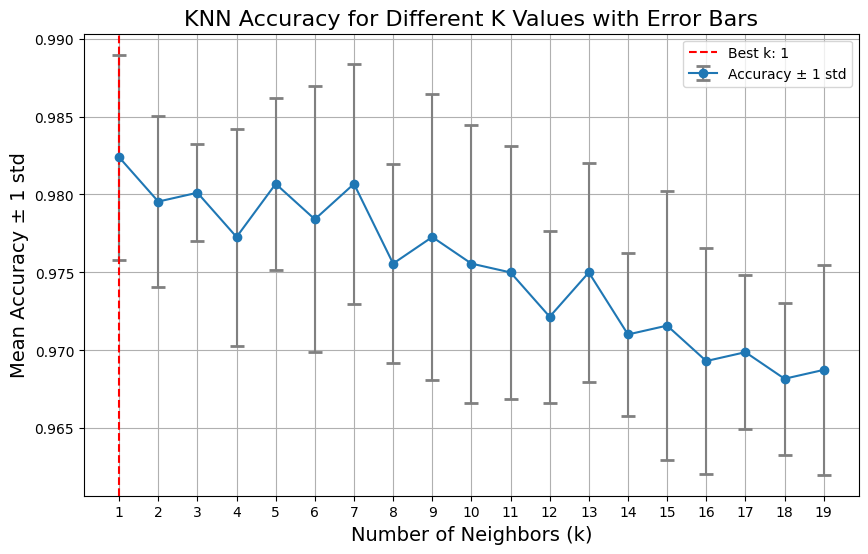

In [ ]:
plt.figure(figsize=(10, 6))
mean_accuracies = cv_results['mean_test_score']
std_accuracies = cv_results['std_test_score']

plt.errorbar(k_values, mean_accuracies, yerr=std_accuracies, fmt='-o', capsize=5, capthick=2, ecolor='gray', label='Accuracy ± 1 std')
plt.xlabel('Number of Neighbors (k)', fontsize=14)
plt.ylabel('Mean Accuracy ± 1 std', fontsize=14)
plt.title('KNN Accuracy for Different K Values with Error Bars', fontsize=16)
plt.grid(True)
plt.xticks(k_values)
plt.axvline(x=best_k, color='r', linestyle='--', label=f'Best k: {best_k}')
plt.legend()
plt.show()


# **Model Evaluation**

A Classification model performance is evaluated based off some important metrics which include:

*   **Accuracy:** the ratio of the number of correct predictions to the total number of input samples.
*   **Precision:** Precision is a measure of quality of predicted data, it is the measure of correctly classified actual positives (i.e when the model predicts rice when the true label is rice).
*   **recall:** as a measure of quantity, it is the ratio of corresctly predicted data to the entire predicted data.
*   **F1 score:** is the harmonic mean of precision and accuracy.

In [ ]:
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train_scaled, y_train)
test_accuracy = best_knn.score(X_test_scaled, y_test)
print(f'Best k: {best_k}')
print(f'Test Set Accuracy: {test_accuracy:.4f}')

Best k: 1
Test Set Accuracy: 0.9636


In [ ]:
y_pred = best_knn.predict(X_test_scaled)

In [ ]:
print(classification_report(y_test, y_pred, target_names=target.unique()))

              precision    recall  f1-score   support

        rice       1.00      1.00      1.00        23
       maize       1.00      1.00      1.00        21
    chickpea       1.00      0.90      0.95        20
 kidneybeans       1.00      1.00      1.00        26
  pigeonpeas       1.00      1.00      1.00        27
   mothbeans       1.00      1.00      1.00        17
    mungbean       0.89      1.00      0.94        17
   blackgram       1.00      1.00      1.00        14
      lentil       0.81      0.91      0.86        23
 pomegranate       0.91      1.00      0.95        20
      banana       0.69      1.00      0.81        11
       mango       1.00      0.90      0.95        21
      grapes       1.00      1.00      1.00        19
  watermelon       1.00      0.88      0.93        24
   muskmelon       1.00      1.00      1.00        19
       apple       1.00      1.00      1.00        17
      orange       1.00      1.00      1.00        14
      papaya       1.00    

In [ ]:
cf_matrix = confusion_matrix(y_test, y_pred)


<Axes: >

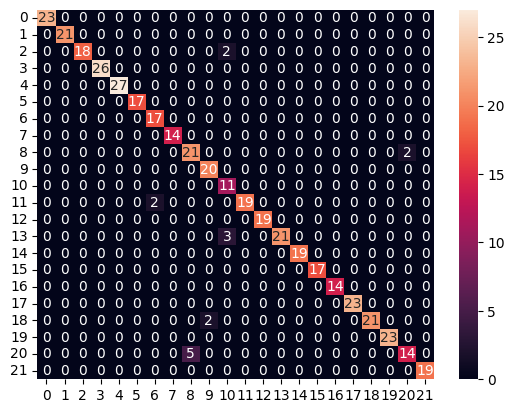

In [ ]:
sns.heatmap(cf_matrix, annot=True)


In [ ]:
accuracy_score(y_test, y_pred)

0.9636363636363636

# **Random Forest classifier**

In [ ]:
# Instantiate the Random Forest classifier
rfc = RandomForestClassifier(random_state=0)

# Define the hyperparameters to tune
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform GridSearchCV with 5-fold cross-validation for hyperparameter tuning
grid_search = GridSearchCV(rfc, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best parameters from the grid search
best_params = grid_search.best_params_

# Fit the model with the best parameters
best_rfc = RandomForestClassifier(random_state=0, **best_params)
best_rfc.fit(X_train, y_train)

# Predict the test set results
y_pred = best_rfc.predict(X_test)

# Check accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(' model accuracy score: {0:0.4f}'.format(accuracy))
# Encode categorical labels
label_encoder = LabelEncoder()
new_y = label_encoder.fit_transform(y)

# Split data into features and target variable
X = data.drop('label', axis=1)


# Train a Random Forest Classifier on the full dataset
clf_prob = RandomForestClassifier(random_state=0)
clf_prob.fit(X, new_y)

# predict  probability for a given crop and soil profile the farmer had in mind.
def predict_initial_probability(crop, soil_profile):
    # Encode the crop label
    try:
        crop_encoded = label_encoder.transform([crop])[0]
    except ValueError as e:
        print(f"Error: {e}. '{crop}' has not been updated to our database.")
        return None

    # Prepare the input data for prediction
    input_data = soil_profile + [crop_encoded]

    # Convert to a DataFrame or reshape as needed to match the input format expected by the classifier
    input_data = pd.DataFrame([input_data], columns=X.columns)

    # Predict probabilities for the input data
    probabilities = clf_prob.predict_proba(input_data)

    return probabilities[0][crop_encoded]

# Use case: Predict initial probability for 'rice' performance with a given soil profile
intended_crop = 'rice'
# N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall'
soil_profile = [90, 42, 43, 20.879744, 82.002744, 6.502985]  # Example soil profile data

initial_probability = predict_initial_probability(intended_crop, soil_profile)
if initial_probability is not None:
    print(f"there's {initial_probability * 100} % of {intended_crop} will deliver good harvest if {intended_crop} is planted. ")



 model accuracy score: 0.9932
Error: invalid literal for int() with base 10: 'rice'. 'rice' has not been updated to our database.


In [ ]:
print(classification_report(y_test, y_pred, target_names=target.unique()))

              precision    recall  f1-score   support

        rice       1.00      1.00      1.00        23
       maize       1.00      1.00      1.00        21
    chickpea       1.00      1.00      1.00        20
 kidneybeans       1.00      1.00      1.00        26
  pigeonpeas       1.00      1.00      1.00        27
   mothbeans       1.00      1.00      1.00        17
    mungbean       1.00      1.00      1.00        17
   blackgram       1.00      1.00      1.00        14
      lentil       0.92      1.00      0.96        23
 pomegranate       1.00      1.00      1.00        20
      banana       0.92      1.00      0.96        11
       mango       1.00      1.00      1.00        21
      grapes       1.00      1.00      1.00        19
  watermelon       1.00      0.96      0.98        24
   muskmelon       1.00      1.00      1.00        19
       apple       1.00      1.00      1.00        17
      orange       1.00      1.00      1.00        14
      papaya       1.00    

<Axes: >

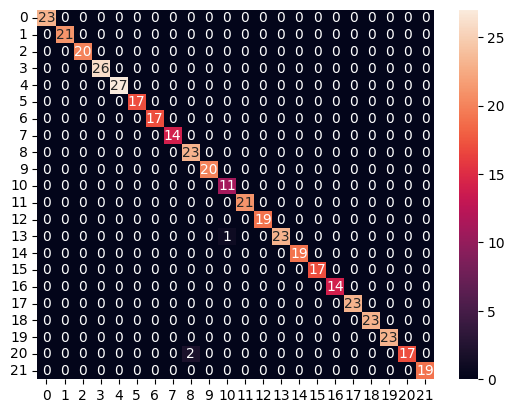

In [ ]:
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True)


# **Naive Bayes Classifier**

In [ ]:
# Create the Gaussian Naive Bayes model
model = GaussianNB()

# Define the hyperparameters to tune
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7]
}

# Perform GridSearchCV with 5-fold cross-validation for hyperparameter tuning
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best parameters from the grid search
best_params = grid_search.best_params_

# Fit the model with the best parameters
best_model = GaussianNB(**best_params)
best_model.fit(X_train, y_train)

# Predict the test set results
y_pred = best_model.predict(X_test)

# Check accuracy score
accuracy = accuracy_score(y_test, y_pred)
print('model accuracy score: {0:0.4f}'.format(accuracy))

model accuracy score: 0.9955


In [ ]:
print(classification_report(y_test, y_pred, target_names=target.unique()))

              precision    recall  f1-score   support

        rice       1.00      1.00      1.00        23
       maize       1.00      1.00      1.00        21
    chickpea       1.00      1.00      1.00        20
 kidneybeans       1.00      1.00      1.00        26
  pigeonpeas       1.00      1.00      1.00        27
   mothbeans       1.00      1.00      1.00        17
    mungbean       1.00      1.00      1.00        17
   blackgram       1.00      1.00      1.00        14
      lentil       0.92      1.00      0.96        23
 pomegranate       1.00      1.00      1.00        20
      banana       1.00      1.00      1.00        11
       mango       1.00      1.00      1.00        21
      grapes       1.00      1.00      1.00        19
  watermelon       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        19
       apple       1.00      1.00      1.00        17
      orange       1.00      1.00      1.00        14
      papaya       1.00    

<Axes: >

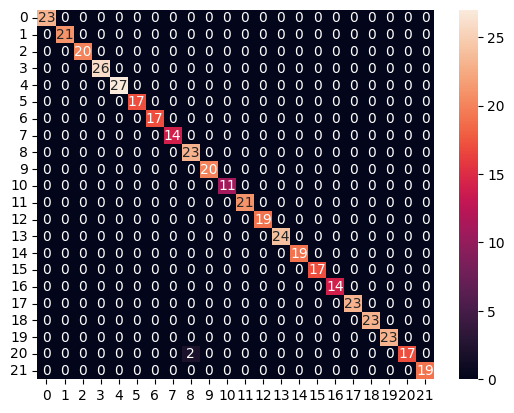

In [ ]:
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True)


In [ ]:
#Label Encoding
label_encoder = LabelEncoder()
data['label'] = label_encoder.fit_transform(data['label'])  # Assuming 'label' is the column for crops


In [ ]:
# Splitting Data for Crop Recommendation Model

X = data.drop(['label'], axis=1)  # Features for soil profile
y = data['label']  # Encoded crop labels

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# 4. Hyperparameter Tuning and Training
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Train and tune the Crop Recommendation Model
rfc = RandomForestClassifier(random_state=0)
grid_search = GridSearchCV(rfc, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Get the best parameters and fit the model
best_params = grid_search.best_params_
best_rfc = RandomForestClassifier(random_state=0, **best_params)
best_rfc.fit(X_train, y_train)

# Save the trained model and label encoder
MODEL_DIR = 'models/'
ENCODER_DIR = 'encoders/'

os.makedirs(MODEL_DIR, exist_ok=True)
os.makedirs(ENCODER_DIR, exist_ok=True)

joblib.dump(best_rfc, os.path.join(MODEL_DIR, 'best_rfc.pkl'))
joblib.dump(label_encoder, os.path.join(ENCODER_DIR, 'label_encoder.pkl'))


Fitting 5 folds for each of 81 candidates, totalling 405 fits


['encoders/label_encoder.pkl']

In [ ]:
#Performance Prediction Model Training
# We'll train this model on the full dataset since it doesn't require splitting.
clf_prob = RandomForestClassifier(random_state=0)
clf_prob.fit(X, y)

# Save the performance prediction model
joblib.dump(clf_prob, os.path.join(MODEL_DIR, 'clf_prob.pkl'))


['models/clf_prob.pkl']

In [ ]:
def predict_initial_probability(crop, soil_profile, model_dir='models/', encoder_dir='encoders/'):
    # Load the models and encoders
    clf_prob = joblib.load(os.path.join(model_dir, 'clf_prob.pkl'))
    label_encoder = joblib.load(os.path.join(encoder_dir, 'label_encoder.pkl'))

    try:
        # Encode the crop label
        crop_encoded = label_encoder.transform([crop])[0]
    except ValueError as e:
        print(f"Error: {e}. '{crop}' is not in the crop database.")
        return None

    # Prepare the input data for prediction
    input_df = pd.DataFrame([soil_profile], columns=X.columns)  # Do NOT include crop as a feature if not used in training

    # Predict probabilities for the input data
    probabilities = clf_prob.predict_proba(input_df)

    return probabilities[0][crop_encoded]


In [ ]:
def recommend_best_crop(soil_profile, model_dir='models/', encoder_dir='encoders/'):
    """
    Parameter:
    - soil_profile (list): List of soil parameters [N, P, K, temperature, humidity, ph, rainfall].
    """
    # Load the models and encoders
    best_rfc = joblib.load(os.path.join(model_dir, 'best_rfc.pkl'))
    label_encoder = joblib.load(os.path.join(encoder_dir, 'label_encoder.pkl'))

    # Prepare the input data for prediction
    input_df = pd.DataFrame([soil_profile], columns=X.columns)

    # Predict the best crop
    crop_encoded = best_rfc.predict(input_df)[0]

    # Decode the crop label
    recommended_crop = label_encoder.inverse_transform([crop_encoded])[0]

    return recommended_crop


In [ ]:
# Use case

# Dummy Soil profile
soil_profile = [64, 23, 46, 25.879744, 82.002744, 7.2, 220]  # Adjust based on your features

# Predict initial probability for intended crop
intended_crop = 'rice'
initial_probability = predict_initial_probability(intended_crop, soil_profile)
if initial_probability is not None:
    print(f"There's a {initial_probability * 100:.2f}% probability that planting {intended_crop} will deliver a good harvest given the soil profile.")

# Recommend the best crop to plant
recommended_crop = recommend_best_crop(soil_profile)
print(f"The recommended crop for the given soil profile is: {recommended_crop}")


There's a 23.00% probability that planting rice will deliver a good harvest given the soil profile.
The recommended crop for the given soil profile is: watermelon
